In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read datasets that were already pre-packaged in other files
# combo  = merge dataset 1 and 2
# ccomo2 = merge dataset 1 2 and 3

combo = pd.read_csv("combo.csv")
combo2 = pd.read_csv("fin_combo.csv")

In [3]:
# drop "Unnamed: 0" column for both combo and combo2

combo = combo.drop('Unnamed: 0',axis = 1)
combo2 = combo2.drop('Unnamed: 0',axis = 1)

## For combo (merged dataset 1 and 2)
### A scatter plot comparing metascore against millions of sales and user score against millions of sales
### A scatter plot comparing metascore against millions of sales and user score against millions of sales by consoles

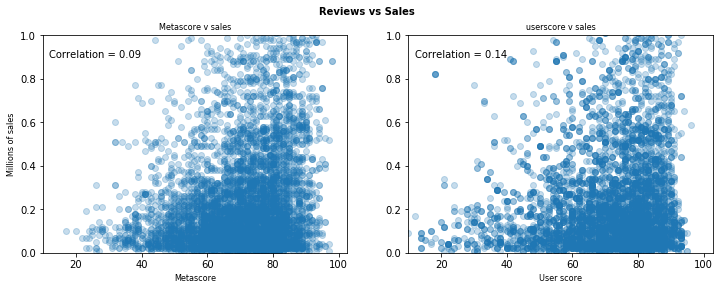

In [4]:
# Code for scatter plot comparing metascore against millions of sales and user score against millions of sales
score_name = ['User_Score','metascore']
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (12, 4)) 
corr_mat = combo.corr()

ax[0].scatter(combo["metascore"], combo["Global_Sales"], alpha= 0.25)
ax[1].scatter(combo["User_Score"], combo["Global_Sales"], alpha= 0.25)
fig.suptitle("Reviews vs Sales", fontsize = 10, fontweight = "bold")
count = 0
ax[0].set_title("Metascore v sales", fontsize = 8) 
ax[1].set_title("userscore v sales", fontsize = 8)
for var in ax:
    var.set_ylim(0,1)
    cr = corr_mat.Global_Sales[score_name[count]] # get the correlation matrix
    message = "Correlation = " + str(round(cr,2)) # put the stuff together
    count+=1
    var.text(40, 0.9, message, horizontalalignment='right')
ax[0].set_xlabel("Metascore", fontsize = 8)
ax[1].set_xlabel("User score", fontsize =8)
ax[0].set_xlim(100)
ax[1].set_xlim(10)
ax[0].set_ylabel("Millions of sales", fontsize = 8)
plt.show()

In [5]:
# Split combo into smaller dataframes according to the console and store them in a list "grouped"
grouped = combo.groupby('console')

In [6]:
# Create a dataframe called combonintendo, in which info on Nintendo will be stored
combonintendo = grouped.get_group('GC') # Store info on the Nintendo GameCube as of this line.

# Add info on the Nintendo 64 to combonintendo.
combonintendo = combonintendo.append(grouped.get_group('N64'), ignore_index = True)
combonintendo = combonintendo.append(grouped.get_group('DS'), ignore_index = True)
combonintendo = combonintendo.append(grouped.get_group('3DS'), ignore_index = True)
combonintendo = combonintendo.append(grouped.get_group('WII'), ignore_index = True)
combonintendo = combonintendo.append(grouped.get_group('GBA'), ignore_index = True)
combonintendo = combonintendo.append(grouped.get_group('WIIU'), ignore_index = True)
combonintendo = combonintendo.append(grouped.get_group('Switch'), ignore_index = True)

In [7]:
#Create a dataframe called combosony, in which info on pc will be stored
combopc = grouped.get_group('PC')

In [8]:
combopc.columns

Index(['metascore', 'title', 'console', 'date', 'Global_Sales', 'User_Score'], dtype='object')

In [9]:
# Create a dataframe called comboxbox, in which info on XBOX Line of consoles will be stored
comboxbox = grouped.get_group('XONE') # Store info on the XBOX One as of this line

comboxbox = comboxbox.append(grouped.get_group('X360'), ignore_index = True)
# Add info on the Xbox 360 to comboxbox
comboxbox = comboxbox.append(grouped.get_group('XBOX'), ignore_index = True)#
# Add info on the Xbox to comboxbox

In [10]:
# Create a dataframe called combosony, in which info on Playstation Line of consoles will be stored
combosony = grouped.get_group('PS') # Store info on the original Playstation as of this line.

combosony = combosony.append(grouped.get_group('PS2'), ignore_index = True)
# Add info on the Playstation 2 to combosony.
combosony = combosony.append(grouped.get_group('PS3'), ignore_index = True)
# Add info on the Playstation 3 to combosony.
combosony = combosony.append(grouped.get_group('PS4'), ignore_index = True)
# Add info on the Playstation 4 to combosony.
combosony = combosony.append(grouped.get_group('PSP'), ignore_index = True)
# Add info on the Playstation Portable to combosony.
combosony = combosony.append(grouped.get_group('VITA'), ignore_index = True)
# Add info on the Playstation Vita to combosony.

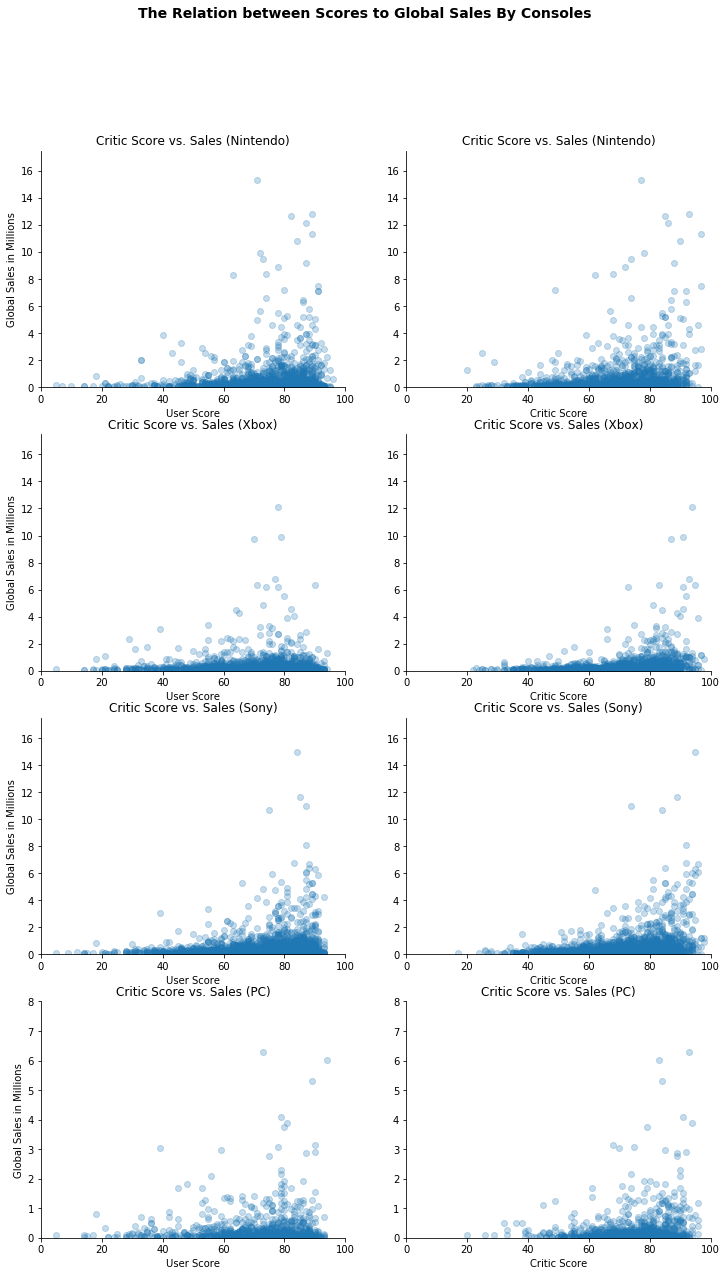

In [11]:
# Code for scatter plot comparing metascore against millions of sales and user score against millions of sales by consoles
nice_name = ['Nintendo','Xbox','Sony','PC']
combo_name = [combonintendo,comboxbox,combosony,combopc]

fig, ax = plt.subplots(nrows = 4, ncols = 2, sharex = False, figsize = (12,20))
ax = ax.ravel()

fig.suptitle("The Relation between Scores to Global Sales By Consoles", fontsize = 14, fontweight = "bold") 

count = 0
for var in ax:
    temp = combo_name[count//2]
    var.set_title('Critic Score vs. Sales ('+ nice_name[count//2]+')')
    if count%2 == 0:
        var.set_xlabel('User Score')
        var.set_ylabel('Global Sales in Millions')
        var.scatter(temp["User_Score"], temp["Global_Sales"],alpha= 0.25)
    else:
        var.set_xlabel('Critic Score')
        var.scatter(temp["metascore"], temp["Global_Sales"],alpha= 0.25)
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    var.set_xlim(0,100)
    if count > 5:
        var.set_ylim(0,8)
    else: 
        var.set_ylim(0,17.5)
    count+=1
plt.show()

## For combo 2(merged dataset 1 2 and 3)
### A scatter plot comparing metascore against millions of sales and user score against millions of sales
### A line graph comparing annual avg sales, user scores, critic scores against year
### A scatter plot comparing metascore against millions of sales and user score against millions of sales by consoles

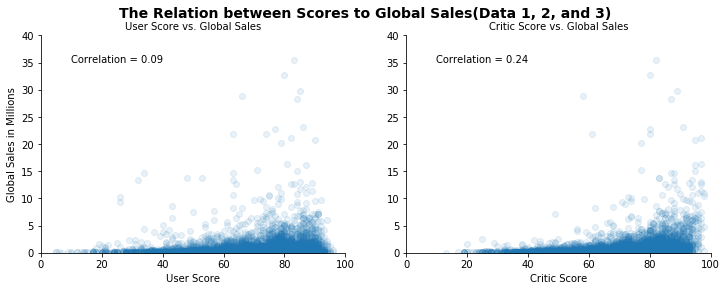

In [12]:
# Code for scatter plot comparing metascore against sales and user score against sales
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (12,4))
corr_mat1 = combo2.corr()
#labels
fig.suptitle("The Relation between Scores to Global Sales(Data 1, 2, and 3)", fontsize = 14, fontweight = "bold") 
ax[0].set_title("User Score vs. Global Sales", fontsize = 10) 
ax[1].set_title("Critic Score vs. Global Sales", fontsize = 10)

count = 0
name_list = ['userscore','metascore']

for var in ax: 
    var.scatter(combo2[name_list[count]], combo2["tot_sale"],alpha= 0.1)
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    cr = corr_mat1.tot_sale[name_list[count]] # get the correlation matrix
    message = "Correlation = " + str(round(cr,2))
    var.text(40, 35, message, horizontalalignment='right')
    var.set_xlim(0,100)
    var.set_ylim(0,40)
    count+=1
ax[0].set_ylabel("Global Sales in Millions")

ax[0].set_xlabel("User Score")
ax[1].set_xlabel("Critic Score")
plt.show()

In [13]:
# Create a new dataframe containing avg sales, metascore, and user score for each year

combo2.sort_values("date", axis = 0, ascending = True, inplace = True)
# Make a list, year that contains all the years in combo2
year = []
for i in combo2.date:
    if year.count(i) == 0:
        year.append(i)

In [14]:
# Make three lists, each containing the annual average sale, user score, and critic score
avg1 = 0
avg2 = 0
avg3 = 0
avg_sale = []
avg_user = []
avg_critic = []
for i in year:
    avg1 = combo2[combo2.date == i].tot_sale.mean()
    avg2 = combo2[combo2.date == i].userscore.mean()
    avg3 = combo2[combo2.date == i].metascore.mean()
    avg_sale.append(avg1)
    avg_user.append(avg2)
    avg_critic.append(avg3)
    avg1 = 0
    avg2 = 0
    avg3 = 0

In [15]:
# Make lists, years, avgsale, avguser,and acgcritic into pandas.Series
years = pd.Series(year,name='year')
avgsale = pd.Series(avg_sale, name = 'sale')
avguser = pd.Series(avg_user,name= 'user_score')
avgcritic = pd.Series(avg_critic, name = 'critic_score')

In [16]:
# Concat all the four series into a dataframe called annual_mean_combo
annual_mean_combo = pd.concat([years,avgsale,avguser,avgcritic],axis=1)
annual_mean_combo =annual_mean_combo.set_index('year')

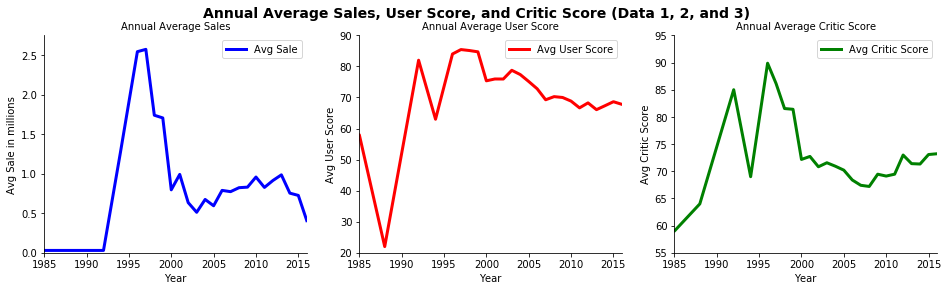

In [17]:
# Code for line graph comparing annual avg sales, user scores, critic scores against year
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))

#labels
fig.suptitle("Annual Average Sales, User Score, and Critic Score (Data 1, 2, and 3)", fontsize = 14, fontweight = "bold") 
ax[0].set_title("Annual Average Sales", fontsize = 10) 
ax[1].set_title("Annual Average User Score", fontsize = 10)
ax[2].set_title("Annual Average Critic Score", fontsize = 10)

count = 0
name_list = ['sale','user_score','critic_score']

annual_mean_combo.sale.plot(ax = ax[0], color = 'b', linewidth = 3.0)
annual_mean_combo.user_score.plot(ax = ax[1], color = 'r', linewidth = 3.0)
annual_mean_combo.critic_score.plot(ax = ax[2], color = 'g', linewidth = 3.0)
for var in ax: 
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    
    var.set_xlabel('Year')
    var.set_xlim(1985,2016)
    
    if count == 0 :
        var.set_ylabel('Avg Sale in millions')
        var.set_ylim(0,2.75)
    elif count == 1:
        var.set_ylabel('Avg User Score')
        var.set_ylim(20,90)
    else:
        var.set_ylabel('Avg Critic Score')
        var.set_ylim(55,95)
    ax[0].legend(["Avg Sale"],frameon=True)
    ax[1].legend(["Avg User Score"],frameon=True)
    ax[2].legend(["Avg Critic Score"],frameon=True)
    count+=1    
plt.show()

In [18]:
# Split combo2 into smaller dataframes according to the console and store them in an array "grouped"
grouped2 = combo2.groupby('console')

In [19]:
# Create a dataframe called combonintendo, in which info on Nintendo will be stored
combonintendo = grouped2.get_group('GC') # Store info on the Nintendo GameCube as of this line.

# Add info on the DS, 3DS, Wii, WiiU, and Gameboy Advance to combonintendo
combonintendo = combonintendo.append(grouped2.get_group('DS'), ignore_index = True)
combonintendo = combonintendo.append(grouped2.get_group('3DS'), ignore_index = True)
combonintendo = combonintendo.append(grouped2.get_group('Wii'), ignore_index = True)
combonintendo = combonintendo.append(grouped2.get_group('GBA'), ignore_index = True)
combonintendo = combonintendo.append(grouped2.get_group('WiiU'), ignore_index = True)

In [20]:
console_name = []
for i in combo2.console:
    if console_name.count(i) == 0:
        console_name.append(i)
console_name

['PC',
 'PS3',
 'GC',
 'PS2',
 'X360',
 'XB',
 'Wii',
 'PSP',
 'DS',
 'GBA',
 'PS',
 '3DS',
 'PSV',
 'DC',
 'WiiU',
 'PS4',
 'XOne']

In [21]:
# Create a dataframe called comboxbox, in which info on XBOX Line of consoles will be stored
comboxbox = grouped2.get_group('XOne') # Store info on the XBOX One as of this line.

# Add info on Xbox 360 and Xbox to comboxbox
comboxbox = comboxbox.append(grouped2.get_group('X360'), ignore_index = True)
comboxbox = comboxbox.append(grouped2.get_group('XB'), ignore_index = True)

In [22]:
# Create a dataframe called combosony, in which info on the Playstation Line of consoles will be added
combosony = grouped2.get_group('PS') # Store info on the original Playstation as of this line.

# Add info on Playstation 2, 3, 4, Portable, Vita to combosony
combosony = combosony.append(grouped2.get_group('PS2'), ignore_index = True)
combosony = combosony.append(grouped2.get_group('PS3'), ignore_index = True)
combosony = combosony.append(grouped2.get_group('PS4'), ignore_index = True)
combosony = combosony.append(grouped2.get_group('PSP'), ignore_index = True)
combosony = combosony.append(grouped2.get_group('PSV'), ignore_index = True)

In [23]:
# Create a dataframe called combosony, in which information on pc will be stored
combopc = grouped2.get_group('PC')

In [24]:
combopc.columns

Index(['console', 'date', 'metascore', 'name', 'tot_sale', 'userscore'], dtype='object')

KeyError: 'Global_Sales'

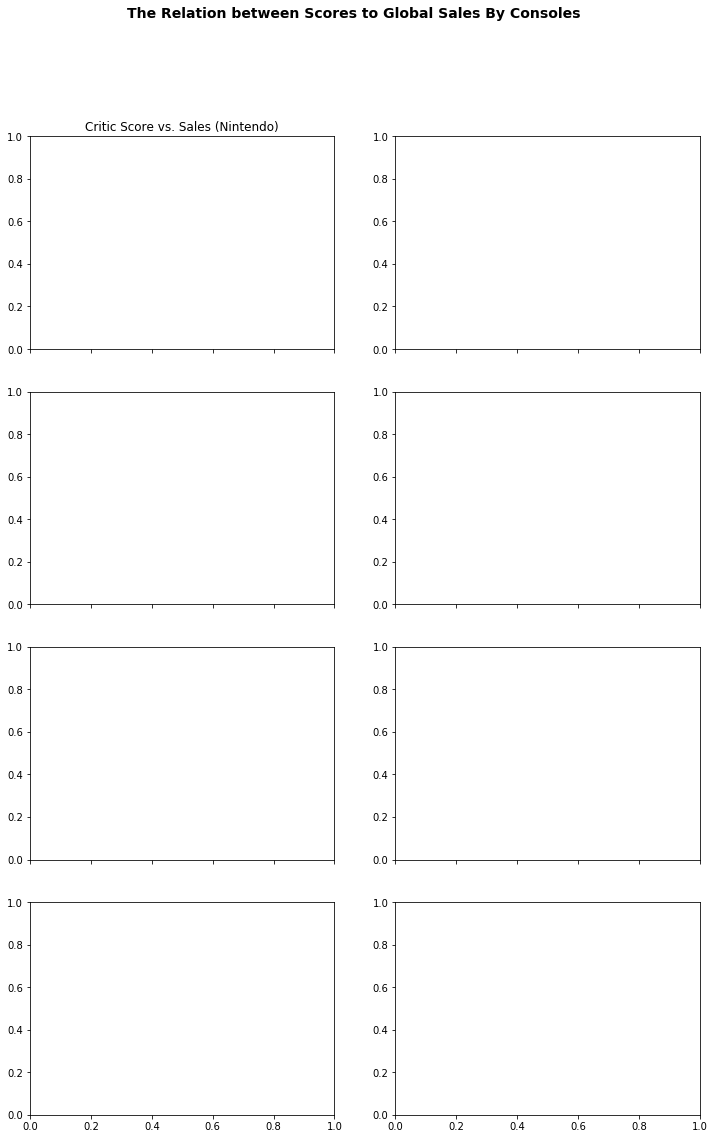

In [25]:
# Code for scatter plot comparing metascore against millions of sales and user score against millions of sales by consoles
fig, ax = plt.subplots(nrows = 4, ncols = 2, sharex = True, figsize = (12,18))
ax = ax.ravel()
#labels
fig.suptitle("The Relation between Scores to Global Sales By Consoles", fontsize = 14, fontweight = "bold") 
nice_name = ['Nintendo','Xbox','Sony','PC']
combo_name = [combonintendo,comboxbox,combosony,combopc]

count = 0
for var in ax:
    temp = combo_name[count//2]
    var.set_title('Critic Score vs. Sales ('+ nice_name[count//2]+')')
    
    if count%2 == 0:
        var.scatter(temp["userscore"], temp["Global_Sales"],alpha= 0.25)
        var.set_xlabel('User Score')
        var.set_ylabel('Global Sales in Millions')
    else:
        var.scatter(temp["metascore"], temp["Global_Sales"],alpha= 0.25)
        var.set_xlabel('Critic Score')
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    var.set_xlim(0,100)
    if count > 5:
        var.set_ylim(0,8)
    else: 
        var.set_ylim(0,17.5)
    count+=1
plt.show()